### Import independencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import image
import matplotlib.pyplot as plt
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense

# Part I: Data overview


In [2]:
# Loading our dataset 
data = pd.read_csv('weatherAUS.csv')
print(data.info())
print("----------------------------")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
# Loading our dataset 
data = pd.read_csv('weatherAUS.csv')
data["Date"] = pd.to_datetime(data["Date"])       # Change to datetime type so we can then divide into year , month and day
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data.drop("Date",axis=1,inplace=True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [4]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

# Part II: Data preprocessing:

## A. Categorical features:  Replace missing values by common and encoding

In [5]:
# categorical feature
cat_feature = [i for i in data.columns if data[i].dtype=='O']
data[cat_feature].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [6]:
for col in cat_feature:
    if data[col].isnull().sum() !=0 : 
        common = data[col].mode()[0]         # returns the most frequent value 
        data[col] = data[col].fillna(common)
        

## B: Model
Two models are used, Convolutional and Fully_dense => Try to play with design of layers

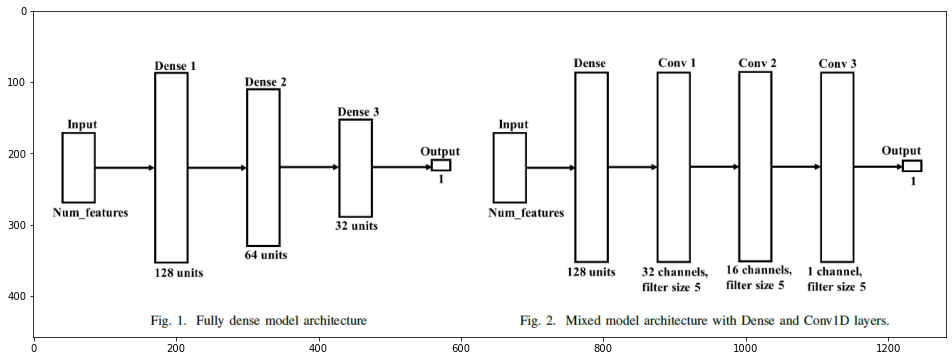

In [7]:
array  = image.imread('design.png')
plt.figure(figsize = (20,6))
plt.imshow(array)

In [8]:
from tensorflow.keras.layers import Dense , Dropout, Conv1D, Reshape, BatchNormalization as BN
import tensorflow as tf

def train_model(model, name, train_data, val_data, batch_size=100, epochs=15):
    def lr_scheduler(epochs):
        if epochs < 10:
            return 1e-3
        else:
            if epochs < 20:
                return 1e-4
            else:
                return 1e-5

    filepath =  './models/' + name + '.hdf5'
    saving = tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                 save_weights_only=True)
    history = model.fit(
    train_data[0], train_data[1],
    epochs=epochs,
    batch_size=batch_size,
    validation_data=val_data,
    verbose=2,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), saving]
    )   

    return None


def fully_dense_model(num_features, train_data, val_data, 
                      units=32, activation='tanh', rate=0.1):
    inputs = tf.keras.layers.Input(shape=(num_features,))
    x = Dense(4*units, activation=activation)(inputs)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(2*units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Dense(units, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    name = 'fully_dense_num-features=' + str(num_features)
    file_path = './models/' + name + '.hdf5'
    train_model(model, name, train_data, val_data)
    model.load_weights(file_path)
    
    return model

def convolution_model(num_features, train_data, val_data, 
                      units=128, channels=16, kernel_size=5, 
                      activation='tanh', rate=0.1):
    inputs = tf.keras.layers.Input(shape=(num_features,))
    x = Dense(units, activation=activation)(inputs)
    x = Reshape((units, 1))(x)
    x = BN()(x)
    x = Conv1D(2*channels, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Conv1D(channels, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = Conv1D(1, kernel_size, activation=activation)(x)
    x = BN()(x)
    x = Dropout(rate)(x)
    x = tf.keras.layers.Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    name = 'convolution_num-features=' + str(num_features)
    file_path = './models/' + name + '.hdf5'
    train_model(model, name, train_data, val_data)
    model.load_weights(file_path)
    
    return model





## C: Encoding

In [9]:
df = data.copy()

In [10]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for col in cat_feature:
    lbl = LabelEncoder()
    lbl.fit(list(df[col].values))
    df[col] = lbl.transform(df[col].values)

In [11]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


## D: Handle NaN values: replaced by mean values 
This part should be seperated between train and test set

In [12]:
n_drop = []
frac = np.arange(0,0.9,0.1)
N = len(df.index)
for f in frac:
    buff = [i for i in df.columns if (df[i].isnull().sum())/N > f ]
    n_drop.append(len(buff))
    

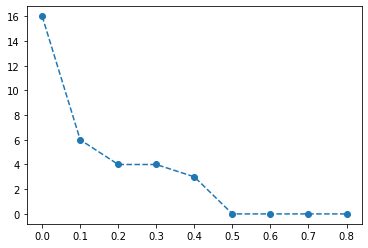

In [13]:
plt.plot(frac, n_drop, 'o--')

Then i would choose different slpitting rate of 0.1, 0.2, 0.3, 0.4 and 0.5

## Part III: Testing

Split and standardize data

In [14]:
from sklearn.impute import SimpleImputer
nan_col = [i for i in df.columns if df[i].isnull().sum() != 0 ]

In [15]:
def mean_handle_nan(X_train, X_test, nan_frac):
    global nan_col,df
    buff = [i for i in nan_col if (df[i].isnull().sum())/N < nan_frac]
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    for col in  nan_col:
        if col in buff:
            X_train[[col]] = imputer.fit_transform(X_train[[col]])
            X_test[[col]] = imputer.fit_transform(X_test[[col]])
        else:
            X_train = X_train.drop(columns=col)
            X_test = X_test.drop(columns=col)
    return X_train,X_test

In [16]:
df_train, df_test = train_test_split(df,test_size=0.2, random_state=0)
X_train = df_train.drop(["RainTomorrow"], axis=1)
y_train = df_train.RainTomorrow
X_test = df_test.drop(["RainTomorrow"], axis=1)
y_test = df_test.RainTomorrow
X_train,X_test = mean_handle_nan(X_train,X_test, 0.1)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
 # create model
model = Sequential()
model.add(Dense(1024, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# Fit the model
history = model.fit(X_train, y_train, epochs= 15, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 1/15
1164/1164 [==============================] - 8s 6ms/step - loss: 0.3779 - binary_accuracy: 0.8397 - val_loss: 0.3701 - val_binary_accuracy: 0.8436
Epoch 2/15
1164/1164 [==============================] - 7s 6ms/step - loss: 0.3672 - binary_accuracy: 0.8434 - val_loss: 0.3645 - val_binary_accuracy: 0.8447
Epoch 3/15
1164/1164 [==============================] - 7s 6ms/step - loss: 0.3623 - binary_accuracy: 0.8456 - val_loss: 0.3673 - val_binary_accuracy: 0.8447
Epoch 4/15
1164/1164 [==============================] - 7s 6ms/step - loss: 0.3579 - binary_accuracy: 0.8466 - val_loss: 0.3606 - val_binary_accuracy: 0.8468
Epoch 5/15
1164/1164 [==============================] - 7s 6ms/step - loss: 0.3548 - binary_accuracy: 0.8482 - val_loss: 0.3597 - val_binary_accuracy: 0.8466
Epoch 6/15
1164/1164 [==============================] - 7s 6ms/step - loss: 0.3507 - binary_accuracy: 0.8498 - val_loss: 0.3609 - val_binary_accuracy: 0.8488
Epoch 7/15
1164/1164 [==============================

In [19]:
best_model= None
best_rate=0
best = 0

f= open("results2.txt","w+")
f.write('invalid_rate , features , accuracy \n' )
for invalid_rate in [0.1,0.2,0.3, 0.4,0.5]:
    
    df_train, df_test = train_test_split(df,test_size=0.2, random_state=0)
    X_train = df_train.drop(["RainTomorrow"], axis=1)
    y_train = df_train.RainTomorrow
    X_test = df_test.drop(["RainTomorrow"], axis=1)
    y_test = df_test.RainTomorrow
    
    X_train,X_test = mean_handle_nan(X_train,X_test, invalid_rate)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = Sequential()
    num_features = X_train.shape[1]
    model.add(Dense(1024, input_dim= num_features, activation='relu'))
    model.add(Dense(712, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                                   restore_best_weights =True )
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    # Fit the model
    history = model.fit(X_train, y_train, epochs= 15, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
    # evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    loss, accuracy = model.evaluate(X_test,y_test)
    string = str(invalid_rate)+' '+str(num_features)+' '+str(accuracy) +'\n'
    f.write(string)
    if best < accuracy:
            best = accuracy
            best_rate = invalid_rate
f.close()

Epoch 1/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3769 - binary_accuracy: 0.8395 - val_loss: 0.3664 - val_binary_accuracy: 0.8442
Epoch 2/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3669 - binary_accuracy: 0.8441 - val_loss: 0.3673 - val_binary_accuracy: 0.8448
Epoch 3/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3619 - binary_accuracy: 0.8454 - val_loss: 0.3615 - val_binary_accuracy: 0.8473
Epoch 4/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3577 - binary_accuracy: 0.8467 - val_loss: 0.3589 - val_binary_accuracy: 0.8487
Epoch 5/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3540 - binary_accuracy: 0.8484 - val_loss: 0.3586 - val_binary_accuracy: 0.8488
Epoch 6/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3502 - binary_accuracy: 0.8506 - val_loss: 0.3611 - val_binary_accuracy: 0.8488
Epoch 7/15
1164/1164 [==============================

Epoch 5/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3364 - binary_accuracy: 0.8555 - val_loss: 0.3459 - val_binary_accuracy: 0.8529
Epoch 6/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3323 - binary_accuracy: 0.8571 - val_loss: 0.3452 - val_binary_accuracy: 0.8522
Epoch 7/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3281 - binary_accuracy: 0.8592 - val_loss: 0.3455 - val_binary_accuracy: 0.8539
Epoch 8/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3232 - binary_accuracy: 0.8609 - val_loss: 0.3413 - val_binary_accuracy: 0.8534
Epoch 9/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3178 - binary_accuracy: 0.8640 - val_loss: 0.3437 - val_binary_accuracy: 0.8525
Epoch 10/15
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3116 - binary_accuracy: 0.8662 - val_loss: 0.3447 - val_binary_accuracy: 0.8526
Epoch 11/15
1164/1164 [============================

In [20]:
print('best rate: ', best_rate, 'best accuracy: ', best)

best rate:  0.2 best accuracy:  0.8494431376457214


In [21]:
num_features = X_train.shape[1]
model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_18 (Dense)            (None, 128)               3200      
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 batch_normalization (BatchN  (None, 128, 1)           4         
 ormalization)                                                   
                                                                 
 conv1d (Conv1D)             (None, 124, 32)           192       
                                                                 
 batch_normalization_1 (Batc  (None, 124, 32)          128       
 hNormalization)                                             

In [22]:
loss, accuracy = model.evaluate(X_test,y_test)

910/910 [==============================] - 2s 2ms/step - loss: 0.3414 - accuracy: 0.8553


In [23]:
model = fully_dense_model(num_features,  (X_train,y_train), (X_test, y_test), units=32)
loss, accuracy = model.evaluate(X_test,y_test)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_20 (Dense)            (None, 128)               3200      
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                           

## Part IV: Choosing the best model

In [24]:
best_model= None
best_rate=0
best_architecture = None
best = 0

f= open("results.txt","w+")
f.write('invalid_rate , model , features , accuracy \n' )
for invalid_rate in [0.1,0.2,0.3, 0.4,0.5]:
    
    df_train, df_test = train_test_split(df,test_size=0.2, random_state=0)
    X_train = df_train.drop(["RainTomorrow"], axis=1)
    y_train = df_train.RainTomorrow
    X_test = df_test.drop(["RainTomorrow"], axis=1)
    y_test = df_test.RainTomorrow
    
    X_train,X_test = mean_handle_nan(X_train,X_test, invalid_rate)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    num_features = X_train.shape[1]
    
    for archi in ['fully_dense','conv']:
        string = None
        if archi == 'fully_dense':
            model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units=32)
            loss, accuracy = model.evaluate(X_test,y_test)
            

        else:
            model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)
            loss, accuracy = model.evaluate(X_test,y_test)
        string = str(invalid_rate)+' '+ archi+' '+str(num_features)+' '+str(accuracy) +'\n'
        f.write(string)
            
        if best < accuracy:
            best = accuracy
            best_model = model
            best_rate = invalid_rate
            best_architecture = archi
f.close()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_24 (Dense)            (None, 128)               2432      
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                           

Epoch 11/15
1164/1164 - 24s - loss: 0.3567 - accuracy: 0.8478 - val_loss: 0.3605 - val_accuracy: 0.8471 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 12/15
1164/1164 - 24s - loss: 0.3554 - accuracy: 0.8489 - val_loss: 0.3605 - val_accuracy: 0.8471 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 13/15
1164/1164 - 24s - loss: 0.3549 - accuracy: 0.8493 - val_loss: 0.3604 - val_accuracy: 0.8473 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 14/15
1164/1164 - 26s - loss: 0.3552 - accuracy: 0.8487 - val_loss: 0.3603 - val_accuracy: 0.8473 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.3545 - accuracy: 0.8497 - val_loss: 0.3603 - val_accuracy: 0.8472 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3614 - accuracy: 0.8479
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 

Epoch 5/15
1164/1164 - 28s - loss: 0.3524 - accuracy: 0.8485 - val_loss: 0.3525 - val_accuracy: 0.8501 - lr: 0.0010 - 28s/epoch - 24ms/step
Epoch 6/15
1164/1164 - 27s - loss: 0.3513 - accuracy: 0.8497 - val_loss: 0.3526 - val_accuracy: 0.8496 - lr: 0.0010 - 27s/epoch - 23ms/step
Epoch 7/15
1164/1164 - 26s - loss: 0.3495 - accuracy: 0.8487 - val_loss: 0.3500 - val_accuracy: 0.8507 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 8/15
1164/1164 - 26s - loss: 0.3481 - accuracy: 0.8512 - val_loss: 0.3498 - val_accuracy: 0.8515 - lr: 0.0010 - 26s/epoch - 23ms/step
Epoch 9/15
1164/1164 - 26s - loss: 0.3472 - accuracy: 0.8512 - val_loss: 0.3519 - val_accuracy: 0.8504 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 10/15
1164/1164 - 26s - loss: 0.3462 - accuracy: 0.8516 - val_loss: 0.3481 - val_accuracy: 0.8506 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 11/15
1164/1164 - 26s - loss: 0.3409 - accuracy: 0.8539 - val_loss: 0.3467 - val_accuracy: 0.8514 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 12/15
11

Epoch 1/15
1164/1164 - 26s - loss: 0.3888 - accuracy: 0.8313 - val_loss: 0.3659 - val_accuracy: 0.8448 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 2/15
1164/1164 - 25s - loss: 0.3648 - accuracy: 0.8439 - val_loss: 0.3585 - val_accuracy: 0.8480 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 3/15
1164/1164 - 25s - loss: 0.3601 - accuracy: 0.8450 - val_loss: 0.3557 - val_accuracy: 0.8473 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 4/15
1164/1164 - 25s - loss: 0.3561 - accuracy: 0.8474 - val_loss: 0.3551 - val_accuracy: 0.8480 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 5/15
1164/1164 - 25s - loss: 0.3549 - accuracy: 0.8474 - val_loss: 0.3540 - val_accuracy: 0.8481 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 6/15
1164/1164 - 26s - loss: 0.3525 - accuracy: 0.8486 - val_loss: 0.3524 - val_accuracy: 0.8511 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 7/15
1164/1164 - 26s - loss: 0.3510 - accuracy: 0.8497 - val_loss: 0.3526 - val_accuracy: 0.8505 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 8/15
1164/1164

 flatten_4 (Flatten)         (None, 116)               0         
                                                                 
 dense_47 (Dense)            (None, 1)                 117       
                                                                 
Total params: 5,982
Trainable params: 5,882
Non-trainable params: 100
_________________________________________________________________
Epoch 1/15
1164/1164 - 26s - loss: 0.3884 - accuracy: 0.8313 - val_loss: 0.3638 - val_accuracy: 0.8430 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 2/15
1164/1164 - 25s - loss: 0.3638 - accuracy: 0.8442 - val_loss: 0.3576 - val_accuracy: 0.8462 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 3/15
1164/1164 - 25s - loss: 0.3590 - accuracy: 0.8460 - val_loss: 0.3555 - val_accuracy: 0.8462 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 4/15
1164/1164 - 25s - loss: 0.3553 - accuracy: 0.8469 - val_loss: 0.3511 - val_accuracy: 0.8492 - lr: 0.0010 - 25s/epoch - 21ms/step
Epoch 5/15
1164/1164 - 25s - loss: 0.352

Epoch 1/15
1164/1164 - 26s - loss: 0.3830 - accuracy: 0.8330 - val_loss: 0.3593 - val_accuracy: 0.8441 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 2/15
1164/1164 - 26s - loss: 0.3573 - accuracy: 0.8453 - val_loss: 0.3519 - val_accuracy: 0.8486 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 3/15
1164/1164 - 25s - loss: 0.3512 - accuracy: 0.8484 - val_loss: 0.3497 - val_accuracy: 0.8506 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 4/15
1164/1164 - 26s - loss: 0.3480 - accuracy: 0.8498 - val_loss: 0.3493 - val_accuracy: 0.8497 - lr: 0.0010 - 26s/epoch - 22ms/step
Epoch 5/15
1164/1164 - 25s - loss: 0.3448 - accuracy: 0.8506 - val_loss: 0.3457 - val_accuracy: 0.8517 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 6/15
1164/1164 - 25s - loss: 0.3431 - accuracy: 0.8524 - val_loss: 0.3474 - val_accuracy: 0.8503 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 7/15
1164/1164 - 25s - loss: 0.3413 - accuracy: 0.8526 - val_loss: 0.3440 - val_accuracy: 0.8531 - lr: 0.0010 - 25s/epoch - 22ms/step
Epoch 8/15
1164/1164

In [25]:
print('best model architecture ',best_architecture, 'best rate: ', best_rate, 'best accuracy: ', best)

best model architecture  conv best rate:  0.5 best accuracy:  0.8562491536140442


### 2nd: One - hot encoding

In [26]:
df1 = data.copy()
lbl = LabelEncoder()
lbl.fit(list(df1["RainTomorrow"].values))
df1["RainTomorrow"] = lbl.transform(df1["RainTomorrow"].values)

for col in cat_feature[:-1]:
    buffer = pd.get_dummies(df1[col])
    df1 = pd.concat([df1,buffer], axis = 1)
    df1 = df1.drop(columns = col)

In [27]:
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,S,SE,SSE,SSW,SW,W,WNW,WSW,No,Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
def median_handle_nan(X_train, X_test, nan_frac):
    global nan_col,df
    buff = [i for i in nan_col if (df[i].isnull().sum())/N < nan_frac]
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    for col in  nan_col:
        if col in buff:
            X_train[[col]] = imputer.fit_transform(X_train[[col]])
            X_test[[col]] = imputer.fit_transform(X_test[[col]])
        else:
            X_train = X_train.drop(columns=col)
            X_test = X_test.drop(columns=col)
    return X_train,X_test

In [29]:
df_train, df_test = train_test_split(df1,test_size=0.2, random_state=0)
X_train = df_train.drop(["RainTomorrow"], axis=1)
y_train = df_train.RainTomorrow
X_test = df_test.drop(["RainTomorrow"], axis=1)
y_test = df_test.RainTomorrow
X_train,X_test = median_handle_nan(X_train,X_test, 0.1)


<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [30]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
num_features = X_train.shape[1]
model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 112)]             0         
                                                                 
 dense_54 (Dense)            (None, 128)               14464     
                                                                 
 reshape_6 (Reshape)         (None, 128, 1)            0         
                                                                 
 batch_normalization_42 (Bat  (None, 128, 1)           4         
 chNormalization)                                                
                                                                 
 conv1d_18 (Conv1D)          (None, 124, 32)           192       
                                                                 
 batch_normalization_43 (Bat  (None, 124, 32)          128       
 chNormalization)                                         

In [32]:
best_model= None
best_rate=0
best_architecture = None
best = 0

f= open("results_onehot.txt","w+")
f.write('invalid_rate , model , features , accuracy \n' )
for invalid_rate in [0.1,0.2,0.3, 0.4,0.5]:
    
    df_train, df_test = train_test_split(df1,test_size=0.2, random_state=0)
    X_train = df_train.drop(["RainTomorrow"], axis=1)
    y_train = df_train.RainTomorrow
    X_test = df_test.drop(["RainTomorrow"], axis=1)
    y_test = df_test.RainTomorrow
    X_train,X_test = median_handle_nan(X_train,X_test, invalid_rate)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    num_features = X_train.shape[1]
    
    for archi in ['fully_dense','conv']:
        string = None
        if archi == 'fully_dense':
            model = fully_dense_model(num_features, (X_train,y_train), (X_test, y_test), units=32)
            loss, accuracy = model.evaluate(X_test,y_test)
            

        else:
            model = convolution_model(num_features, (X_train,y_train), (X_test, y_test), units=128)
            loss, accuracy = model.evaluate(X_test,y_test)
        string = str(invalid_rate)+' '+ archi+' '+str(num_features)+' '+str(accuracy) +'\n'
        f.write(string)
            
        if best < accuracy:
            best = accuracy
            best_model = model
            best_rate = invalid_rate
            best_architecture = archi
f.close()

<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 112)]             0         
                                                                 
 dense_56 (Dense)            (None, 128)               14464     
                                                                 
 batch_normalization_46 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_39 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_47 (Bat  (None, 64)               256       
 chNormalization)                                         

Epoch 11/15
1164/1164 - 26s - loss: 0.3048 - accuracy: 0.8719 - val_loss: 0.3572 - val_accuracy: 0.8498 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 12/15
1164/1164 - 26s - loss: 0.3006 - accuracy: 0.8734 - val_loss: 0.3583 - val_accuracy: 0.8494 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 13/15
1164/1164 - 26s - loss: 0.2967 - accuracy: 0.8752 - val_loss: 0.3597 - val_accuracy: 0.8491 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 14/15
1164/1164 - 26s - loss: 0.2946 - accuracy: 0.8758 - val_loss: 0.3611 - val_accuracy: 0.8484 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 15/15
1164/1164 - 26s - loss: 0.2935 - accuracy: 0.8765 - val_loss: 0.3620 - val_accuracy: 0.8479 - lr: 1.0000e-04 - 26s/epoch - 23ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3562 - accuracy: 0.8508


<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 114)]             0         
                                                                 
 dense_62 (Dense)            (None, 128)               14720     
                                                                 
 batch_normalization_53 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_45 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_54 (Bat  (None, 64)               256       
 chNormalization)                                         

Epoch 11/15
1164/1164 - 26s - loss: 0.2886 - accuracy: 0.8779 - val_loss: 0.3436 - val_accuracy: 0.8551 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 12/15
1164/1164 - 25s - loss: 0.2834 - accuracy: 0.8803 - val_loss: 0.3450 - val_accuracy: 0.8548 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 13/15
1164/1164 - 25s - loss: 0.2803 - accuracy: 0.8821 - val_loss: 0.3465 - val_accuracy: 0.8538 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 14/15
1164/1164 - 25s - loss: 0.2782 - accuracy: 0.8835 - val_loss: 0.3483 - val_accuracy: 0.8541 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.2768 - accuracy: 0.8841 - val_loss: 0.3489 - val_accuracy: 0.8533 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.8566


<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 114)]             0         
                                                                 
 dense_68 (Dense)            (None, 128)               14720     
                                                                 
 batch_normalization_60 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_61 (Bat  (None, 64)               256       
 chNormalization)                                         

Epoch 11/15
1164/1164 - 24s - loss: 0.2926 - accuracy: 0.8755 - val_loss: 0.3418 - val_accuracy: 0.8554 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 12/15
1164/1164 - 25s - loss: 0.2873 - accuracy: 0.8789 - val_loss: 0.3432 - val_accuracy: 0.8553 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 13/15
1164/1164 - 25s - loss: 0.2840 - accuracy: 0.8790 - val_loss: 0.3454 - val_accuracy: 0.8550 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 14/15
1164/1164 - 25s - loss: 0.2815 - accuracy: 0.8805 - val_loss: 0.3460 - val_accuracy: 0.8546 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.2799 - accuracy: 0.8824 - val_loss: 0.3472 - val_accuracy: 0.8543 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
910/910 [==============================] - 3s 2ms/step - loss: 0.3400 - accuracy: 0.8576


<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 115)]             0         
                                                                 
 dense_74 (Dense)            (None, 128)               14848     
                                                                 
 batch_normalization_67 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_68 (Bat  (None, 64)               256       
 chNormalization)                                         

Epoch 11/15
1164/1164 - 26s - loss: 0.2934 - accuracy: 0.8756 - val_loss: 0.3432 - val_accuracy: 0.8545 - lr: 1.0000e-04 - 26s/epoch - 22ms/step
Epoch 12/15
1164/1164 - 26s - loss: 0.2882 - accuracy: 0.8775 - val_loss: 0.3447 - val_accuracy: 0.8538 - lr: 1.0000e-04 - 26s/epoch - 23ms/step
Epoch 13/15
1164/1164 - 24s - loss: 0.2848 - accuracy: 0.8795 - val_loss: 0.3464 - val_accuracy: 0.8535 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 14/15
1164/1164 - 24s - loss: 0.2816 - accuracy: 0.8813 - val_loss: 0.3480 - val_accuracy: 0.8536 - lr: 1.0000e-04 - 24s/epoch - 21ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.2795 - accuracy: 0.8821 - val_loss: 0.3492 - val_accuracy: 0.8527 - lr: 1.0000e-04 - 25s/epoch - 21ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.8557


<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[[col]] = imputer.fit_transform(X_test[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<ipython-input-28-fd5231b4aee7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[[col]] = imputer.fit_transform(X_train[[col]])
C:\Users\thien\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-28-fd5231b4aee7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 118)]             0         
                                                                 
 dense_80 (Dense)            (None, 128)               15232     
                                                                 
 batch_normalization_74 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_63 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_75 (Bat  (None, 64)               256       
 chNormalization)                                         

Epoch 11/15
1164/1164 - 25s - loss: 0.2858 - accuracy: 0.8785 - val_loss: 0.3420 - val_accuracy: 0.8550 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
Epoch 12/15
1164/1164 - 25s - loss: 0.2811 - accuracy: 0.8804 - val_loss: 0.3431 - val_accuracy: 0.8553 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
Epoch 13/15
1164/1164 - 25s - loss: 0.2781 - accuracy: 0.8818 - val_loss: 0.3448 - val_accuracy: 0.8540 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
Epoch 14/15
1164/1164 - 25s - loss: 0.2758 - accuracy: 0.8834 - val_loss: 0.3464 - val_accuracy: 0.8539 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
Epoch 15/15
1164/1164 - 25s - loss: 0.2721 - accuracy: 0.8853 - val_loss: 0.3483 - val_accuracy: 0.8535 - lr: 1.0000e-04 - 25s/epoch - 22ms/step
910/910 [==============================] - 2s 2ms/step - loss: 0.3389 - accuracy: 0.8565


In [33]:
print('best model architecture ',best_architecture, 'best rate: ', best_rate, 'best accuracy: ', best)

best model architecture  fully_dense best rate:  0.4 best accuracy:  0.8618520498275757
